In [63]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [64]:
# Set random seeds for reproducibility 
torch.manual_seed(42)

In [65]:
train_data = pd.read_csv(fr"C:\Users\sanje\Desktop\Python_Frameworks_For_Machine_Learning\datafiles\Fashion_MNIST\fashion_mnist_train.csv")
test_data = pd.read_csv(fr"C:\Users\sanje\Desktop\Python_Frameworks_For_Machine_Learning\datafiles\Fashion_MNIST\fashion_mnist_test.csv")

In [66]:
train_data.head()

,(label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


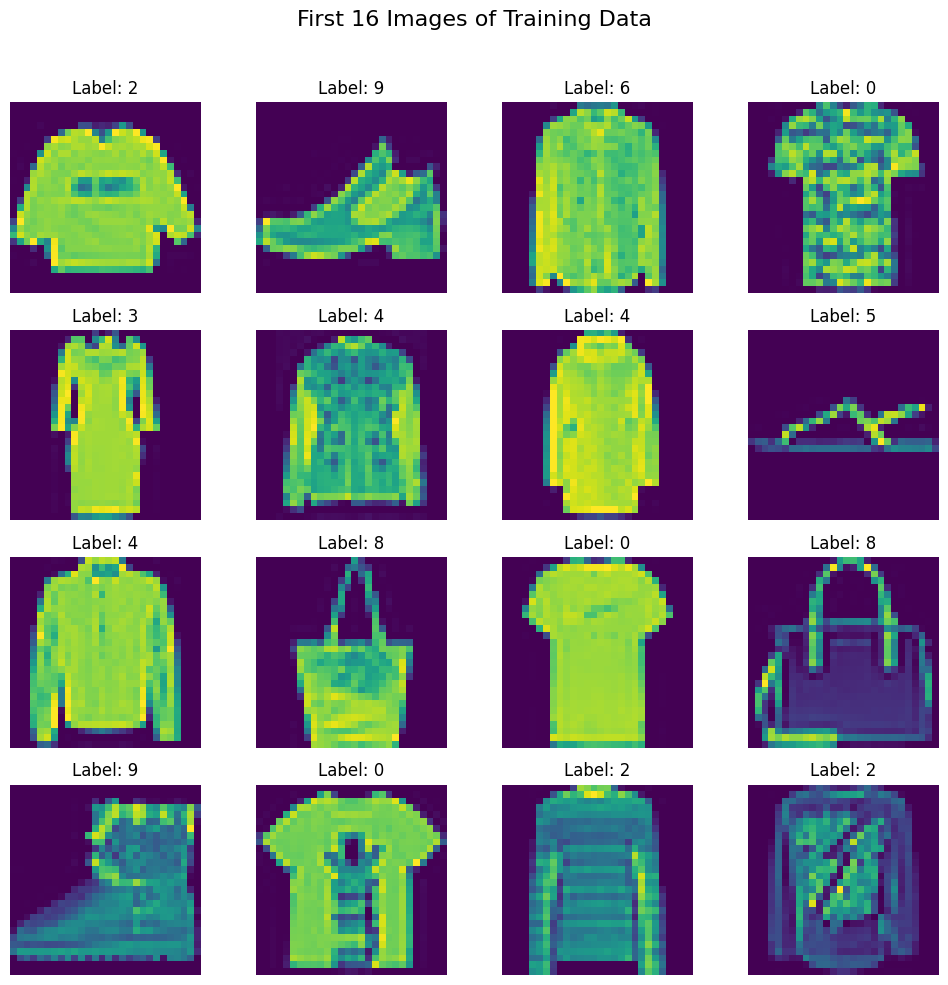

In [68]:
# Create a 4 * 4 grid of images
fig ,axes = plt.subplots(4 , 4, figsize =(10,10))
fig.suptitle("First 16 Images of Training Data", fontsize = 16)


for i , ax in enumerate(axes.flat):
    img = train_data.iloc[i, 1:].values.reshape(28,28)    # Reshape to 28X28
    ax.imshow(img)   # Display in greysacle
    ax.axis("off")   # Remove axis for a cleaner look
    ax.set_title(f"Label: {train_data.iloc[i,0]}")    # Show the label

plt.tight_layout(rect=[0,0,1,0.96])   # Adjust layout to fit the title
plt.show()

In [69]:
X_train = train_data.iloc[:, 1:].values
X_test = test_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
y_test = test_data.iloc[:, 0].values

In [70]:
X_train.shape

(60000, 784)

In [71]:
X_train[[2,]]

array([[  0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0, 105,  92,
        101, 107, 100, 132,   0,   0,   2,   4,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 150,
        227, 211, 171, 191, 236, 228, 172,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 153,
        209, 210, 187, 199, 142, 157, 209, 179, 199, 233, 138,  44,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 120,
        218, 215, 207, 198, 198, 223, 219, 214, 225, 190, 177, 195, 209,
        204, 139,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 208, 200, 197, 202, 193, 203, 207, 228, 245, 196, 197, 202,
        193, 190, 167, 203,  27,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  89, 217, 200, 211, 175, 189, 205, 199, 218, 216, 181,
        179, 185, 192, 198, 184, 198, 121,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 140, 220, 204, 223, 187

In [72]:
y_train.shape

(60000,)

In [73]:
X_test.shape

(10000, 784)

In [74]:
y_test.shape

(10000,)

In [75]:
# Scaling The Features
X_train = X_train/255.0
x_test = X_test/255.0

In [76]:
X_train[[2,]]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01960784, 0.        , 0.        ,
        0.        , 0.41176471, 0.36078431, 0.39607843, 0.41960784,
        0.39215686, 0.51764706, 0.        , 0.        , 0.00784314,
        0.01568627, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.58823529, 0.89019608,
        0.82745098, 0.67058824, 0.74901961, 0.9254902 , 0.89411765,
        0.6745098 , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.18823529, 0.6       ,
        0.81960784, 0.82352941, 0.73333333, 0.78039216, 0.55686275,
        0.61568627, 0.81960784, 0.70196078, 0.78

In [77]:
# create a custom Dataset Class 

class Fashion_MNIST_Dataset(Dataset):
    def __init__(self, features,labels):
        self.features = torch.tensor(features, dtype= torch.float32)
        self.labels = torch.tensor(labels, dtype =torch.long)

    def __len__(self):
        return self.features.shape[0]
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]


In [78]:
train_dataset = Fashion_MNIST_Dataset(X_train,y_train)
test_dataset = Fashion_MNIST_Dataset(X_test, y_test)

In [79]:
len(train_dataset)

60000

In [80]:
len(test_dataset)

10000

In [81]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.2431, 0.2392, 0.0824, 0.1137, 0.0902,
         0.2000, 0.5333, 0.2392, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [82]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False, pin_memory=True)

In [83]:
for batch_features, batch_labels in train_dataloader:
    print(batch_features[0])
    print(batch_labels[0])
    break

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
        0.0314, 0.2353, 0.5686, 0.5451, 0.5765, 0.6588, 0.6824, 0.4902, 0.3333,
        0.0824, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.2667,
        0.8118, 0.8078, 0.9490, 0.9529, 0.9765, 0.9804, 0.9647, 0.9137, 0.9843,
        1.0000, 0.9922, 0.8471, 0.5373, 0.1216, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0000, 0.1412,
        0.7647, 0.8392, 0.8941, 0.9490, 0.8784, 0.8745, 0.8667, 0.9098, 0.8588,
        0.9098, 0.8980, 0.8941, 0.8941, 0.7529, 0.9373, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.5529, 0.9490, 0.9059, 0.8863, 0.9098, 0.8980, 0.8706, 0.8941,
        0.8706, 0.8667, 0.8941, 0.8706, 0.9294, 0.9098, 0.6196, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [84]:
# Define Neural Network Architecture

class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.BatchNorm1d(128),   # Before Activation Function
            nn.ReLU(),
            nn.Dropout(p=0.3), # After Activation Function
            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64,10)
        )
    
    def forward(self, features):
        out = self.layers(features)
        return out

In [85]:
# Train on GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [86]:
# Instantiate The Model
model = MyNN(X_train.shape[1]).to(device=device)

In [87]:
from torchinfo import summary
summary(model, input_size= (10, 784))

Layer (type:depth-idx)                   Output Shape              Param #
MyNN                                     [10, 10]                  --
├─Sequential: 1-1                        [10, 10]                  --
│    └─Linear: 2-1                       [10, 128]                 100,480
│    └─BatchNorm1d: 2-2                  [10, 128]                 256
│    └─ReLU: 2-3                         [10, 128]                 --
│    └─Dropout: 2-4                      [10, 128]                 --
│    └─Linear: 2-5                       [10, 64]                  8,256
│    └─BatchNorm1d: 2-6                  [10, 64]                  128
│    └─ReLU: 2-7                         [10, 64]                  --
│    └─Dropout: 2-8                      [10, 64]                  --
│    └─Linear: 2-9                       [10, 10]                  650
Total params: 109,770
Trainable params: 109,770
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.10
Input size (MB): 0.03
Forward/ba

In [88]:
# Set learning Rate and Epochs
epochs = 100
learning_rate = 0.01

In [89]:
# Loss Function
criterion = nn.CrossEntropyLoss()

# optimizer 
optimizer = optim.SGD(model.parameters(), lr = learning_rate, weight_decay=1e-4)

In [90]:
# Training Loop

for epoch in range(epochs):

    total_epoch_loss = 0 

    for batch_features, batch_labels in train_dataloader:
        # move data to gpu
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        
        # forward pass
        outputs = model(batch_features)
        
        # calculate loss
        loss = criterion(outputs, batch_labels)
        
        # clearing gradients
        optimizer.zero_grad()

        # backward pass
        loss.backward()

        # update parameters
        optimizer.step()
        
        total_epoch_loss += loss.item()
        
    avg_epoch_loss = total_epoch_loss/len(train_dataloader)
    print(f"Epoch : {epoch+1}, Loss : {avg_epoch_loss}")

Epoch : 1, Loss : 1.074775064804915
Epoch : 2, Loss : 0.6613122542529727
Epoch : 3, Loss : 0.5730205018764366
Epoch : 4, Loss : 0.529665942131075
Epoch : 5, Loss : 0.4976602061979298
Epoch : 6, Loss : 0.47740307246952424
Epoch : 7, Loss : 0.46178175029215784
Epoch : 8, Loss : 0.44975852032205954
Epoch : 9, Loss : 0.4387369919052002
Epoch : 10, Loss : 0.42809798639974617
Epoch : 11, Loss : 0.41877782497324667
Epoch : 12, Loss : 0.41449227916406417
Epoch : 13, Loss : 0.40118669316585637
Epoch : 14, Loss : 0.3971247840791877
Epoch : 15, Loss : 0.394254581125052
Epoch : 16, Loss : 0.386191859078814
Epoch : 17, Loss : 0.38075234996738716
Epoch : 18, Loss : 0.37801618448325564
Epoch : 19, Loss : 0.3723656584395529
Epoch : 20, Loss : 0.3658700644143863
Epoch : 21, Loss : 0.36284954105613076
Epoch : 22, Loss : 0.35756083747852585
Epoch : 23, Loss : 0.35597386241340434
Epoch : 24, Loss : 0.35099876486162135
Epoch : 25, Loss : 0.34966875781128404
Epoch : 26, Loss : 0.3468641029365027
Epoch : 27,

In [91]:
# Set the model in eval mode
model.eval()

MyNN(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [94]:
# Evaluation code
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_dataloader:
        
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        outputs = model(batch_features)
        _,predicted_labels = torch.max(outputs, dim = 1)
        total += batch_labels.shape[0]
        
        correct += (predicted_labels  == batch_labels).sum().item()

print(f"Accuracy : {correct/total}")


Accuracy : 0.8352
